In [1]:
# Importing needed libraries

# data manipulation
import pandas as pd
import numpy as np

# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

#Evaluating model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder


# 1 - Introduction and Problem Definition for Customer Segmentation

In the context of a marketing company, the primary objective is to optimize advertising campaigns to reach the most receptive audience and maximize the efficiency of marketing expenditures. To achieve this, we propose a customer segmentation strategy based on potential customers' income levels, as income can correlate significantly with purchasing power. By utilizing additional demographic and socio-economic features such as age, occupation, and education, we aim to enrich our audience profiles. This enriched profiling will allow us to tailor marketing campaigns more precisely, targeting specific segments with tailored messages and products that resonate with their unique preferences and financial capabilities. This approach not only enhances customer engagement but also improves the return on investment for marketing initiatives.

# 2 - Data Preparation

## 2.1 Loading the Dataset

To load the "Adult" dataset into a DataFrame named df. Typically, Python’s Pandas library is used for such tasks because it provides robust tools for data manipulation.

As in the dataset information explain, the missing values are the ones with the symbol '?', for this reason we have included the parameter na_values in the load command.

In [ ]:
# Data Load from the repository Dane
df = pd.read_csv('/content/adult.csv',na_values='?')
#df = pd.read_csv('Dane/adult.csv')

In [ ]:
# observation of dataset head
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

## 2.2 Cleaning the Data

After loading the data, the next step is to clean it. Generally, this involves handling missing values, removing duplicates, and correcting any inconsistencies in the data.

### a. Handling Missing Values:
Missing data is a common issue. For categorical data, we might choose to replace missing values with the mode (the most frequently occurring value) or simply remove rows with missing values depending on the amount of missing data.

In [ ]:
# Check for missing values
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

Given that workclass, occupation, and native-country contain missing values, it is neccesary to analyze the distribution of them, we are going to follow the next approach:
- Step 1: Analyze the Distribution of Missing Values
- Step 2: Examine Rows with Missing Values
- Step 3: Explore Relationships Between Missing Values and Other Variables
- Step 4: Decision Making

Based on this analysis:

- If missing data is randomly distributed and not significant in volume, removing these rows could be justified.
- If there are patterns or significant impacts on key variables like income, more nuanced approaches like imputation or even segment-specific strategies might be necessary.

In [ ]:
# Step 1 Calculate the percentage of missing values in each column
missing_percentages = df.isnull().sum() / len(df) * 100
print(missing_percentages)


age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64


Step 1: Proportion of Missing Values

The results show:

- workclass: Approximately 5.73% missing
- occupation: Approximately 5.75% missing
- native-country: Approximately 1.75% missing

In [ ]:
# Step 2 Display rows with missing 'workclass'
print(df[df['workclass'].isnull()].head())

# Display rows with missing 'occupation'
print(df[df['occupation'].isnull()].head())

# Display rows with missing 'native-country'
print(df[df['native-country'].isnull()].head())


    age workclass  fnlwgt     education  educational-num      marital-status  \
4    18       NaN  103497  Some-college               10       Never-married   
6    29       NaN  227026       HS-grad                9       Never-married   
13   58       NaN  299831       HS-grad                9  Married-civ-spouse   
22   72       NaN  132015       7th-8th                4            Divorced   
35   65       NaN  191846       HS-grad                9  Married-civ-spouse   

   occupation   relationship   race  gender  capital-gain  capital-loss  \
4         NaN      Own-child  White  Female             0             0   
6         NaN      Unmarried  Black    Male             0             0   
13        NaN        Husband  White    Male             0             0   
22        NaN  Not-in-family  White  Female             0             0   
35        NaN        Husband  White    Male             0             0   

    hours-per-week native-country income  
4               30  Unite

Step 2: Characteristics of Rows with Missing Values

Missing workclass and occupation are interesting:

- Most rows with missing workclass and occupation have an income of <=50K.
- The missing values occur across different age groups and education levels.
- The native-country for the rows with missing workclass and occupation appears consistently as "United States", which might not impact the diversity of this subset significantly.

In [ ]:
# Step 3 Check the unique values in 'income' for rows with missing 'workclass' or 'occupation'
if 'workclass' in df.columns and 'occupation' in df.columns and 'income' in df.columns:
    workclass_missing_income = df[df['workclass'].isnull()]['income'].value_counts()
    occupation_missing_income = df[df['occupation'].isnull()]['income'].value_counts()

    print("Income distribution for rows with missing 'workclass':")
    print(workclass_missing_income)
    print("\nIncome distribution for rows with missing 'occupation':")
    print(occupation_missing_income)
else:
    print("Please check column names and missing values filtering.")


Income distribution for rows with missing 'workclass':
income
<=50K    2534
>50K      265
Name: count, dtype: int64

Income distribution for rows with missing 'occupation':
income
<=50K    2544
>50K      265
Name: count, dtype: int64


Step 3: Income Distribution for Rows with Missing Values

The distribution for rows with missing workclass and occupation is heavily skewed towards <=50K:

- <=50K: 2534 entries
- \>50K: 265 entries

This skewness indicates that individuals missing this data are predominantly lower income, which could suggest that these missing values represent a segment of the population potentially less formally employed or employed in roles less frequently captured in census data.

Step 4: Decision Making

we have several options to handle the missing data:

- Imputation: Given the skew towards lower-income categories for rows missing workclass and occupation, it might be prudent to impute missing values based on other factors in the dataset. For instance, using the most frequent values among similar records (e.g., same education level and age group) could be one approach.
- **Segmentation before Imputation**: Since the missing data shows some patterns (mostly low-income earners), we might consider segmenting the dataset based on income before imputing values to avoid bias. This way, you could tailor the imputation strategy to better fit different segments of the dataset, possibly using different strategies for those above and below the 50K income threshold.
- Analysis without Imputation: If imputation could bias the results, especially for the predictive modeling, you may choose to analyze the dataset with these values still missing, particularly if the analysis tools or techniques can handle missing data effectively.
- Removing Rows: Since the missing values amount to less than 6% for the affected columns, removing these rows is also a viable option, especially if maintaining data integrity is crucial and imputation could introduce unwanted noise.

**Finally we are decided the strategy of "Segmentation before Imputation"**

Firsst, I examine the characteristics of each segment separately to understand the most appropriate imputation strategy for each group. This involves looking at the patterns within each segment that might inform what the most likely values for missing data could be.

In [ ]:
# Create segments based on income
low_income = df[df['income'] == '<=50K']
high_income = df[df['income'] == '>50K']

# Analyze missing data within each segment
print("Low Income Segment Missing Data:")
print(low_income.isnull().sum())

print("\nHigh Income Segment Missing Data:")
print(high_income.isnull().sum())

Low Income Segment Missing Data:
age                   0
workclass          2534
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2544
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      637
income                0
dtype: int64

High Income Segment Missing Data:
age                  0
workclass          265
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation         265
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     220
income               0
dtype: int64


For each segment, I decide on and apply an imputation method.

In [ ]:
# Function to impute missing values based on mode for a given dataframe
def impute_with_mode(dataframe):
    imputed_dataframe = dataframe.copy()  # Make a copy to avoid SettingWithCopyWarning
    for column in ['workclass', 'occupation', 'native-country']:
        mode_value = imputed_dataframe[column].mode()[0]
        imputed_dataframe[column].fillna(mode_value, inplace=True)
    return imputed_dataframe

# Apply the imputation function to each segment
low_income_segment = impute_with_mode(low_income)
high_income_segment = impute_with_mode(high_income)

# Combine the segments back into the main dataframe
df_imputed = pd.concat([low_income_segment, high_income_segment])

# Reset the index to maintain data integrity
df_imputed.reset_index(drop=True, inplace=True)



In [ ]:
# Check missing values after imputation
print(df_imputed.isnull().sum())

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


### b. Removing Duplicates:
It’s important to check for and remove any duplicates in the dataset to prevent skewing our analysis.

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

### c. Indetifying Variables Types

In [ ]:
# Display data types of each column
print(df_imputed.dtypes)

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object


In [ ]:
# Count the number of categorical and numerical variables
categorical_vars = df_imputed.select_dtypes(include=['object']).columns
numerical_vars = df_imputed.select_dtypes(include=['int64', 'float64']).columns

print(f'Number of categorical variables: {len(categorical_vars)}')
print(f'Number of numerical variables: {len(numerical_vars)}')

Number of categorical variables: 9
Number of numerical variables: 6


In [ ]:
# list the names of categorical and numerical variables
print("Categorical variables:", categorical_vars)
print("Numerical variables:", numerical_vars)

Categorical variables: Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')
Numerical variables: Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


# 3 - EDA - Exploratory Data Analysis

EDA will help to understand the underlying patterns, spot anomalies, check assumptions, and test hypotheses with the aim of discovering trends, patterns, and relationships among variables.

## 3.1 EDA for Categorical Variables

For categorical variables, we start by examining the distribution of each category and exploring relationships between categorical variables and the target variable (income).

### a. Frequency Distribution of Categories

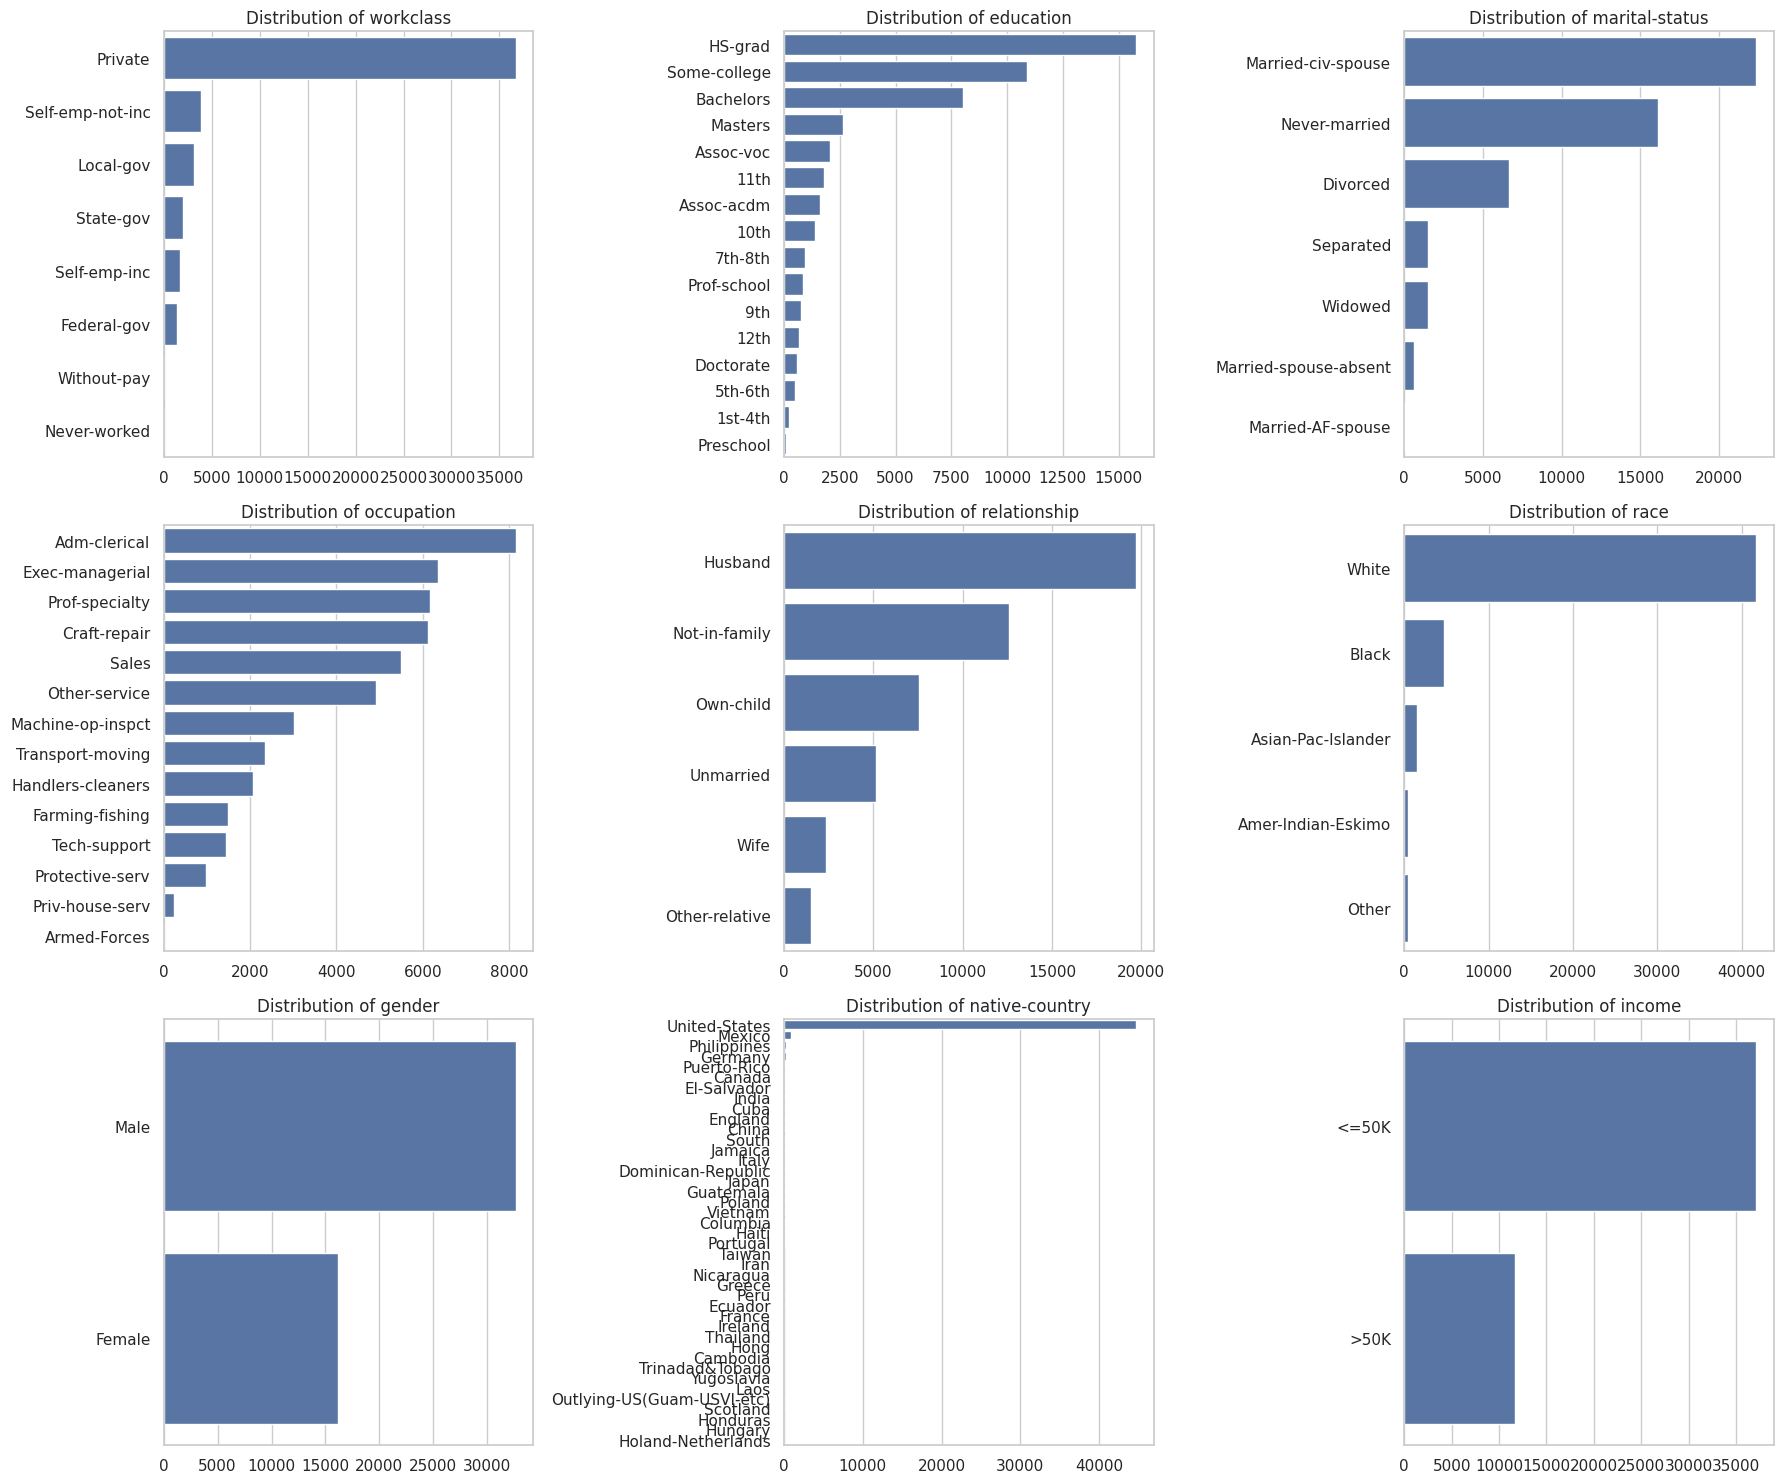

In [ ]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Plotting frequency distributions for categorical variables
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

for i, col in enumerate(df_imputed.select_dtypes(include=['object']).columns):
    sns.countplot(y=col, data=df_imputed, ax=axes[i], order = df_imputed[col].value_counts().index)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


- Distribution of workclass: the most frequent category is "Private" with a huge difference comparing the others.
- Distribution of educacion: the main categories are HS-gradm Some-college and Bachelors.
- Distribution of marital-status: the main categoris are married and never married.
- Distribution of occupation: the most frequent categoris are adm-clerical, exec-amagerial, prof-speciality, craft-repair, sales and other-service.
- Distribution of relationship: Husband, Not in family and Own child
- Distribution of race: the most predominant is white
- ditribution of gender: male doubled to female
- Distribution of native country: the most relevant is united states
- distribution of income: the most predominat is below 50k

### b. Relationships with Target Variable

Explore how each categorical variable relates to the target variable (income).

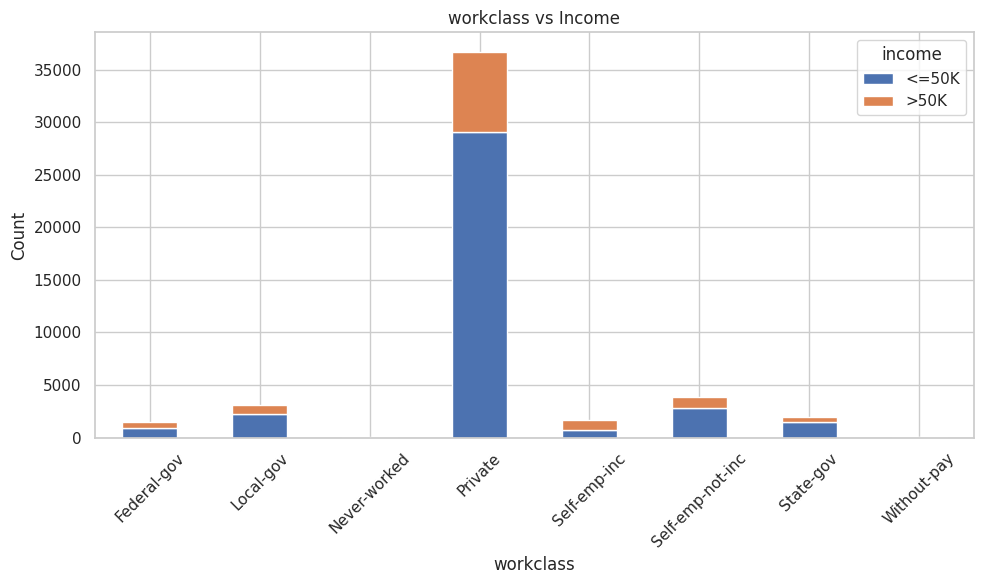

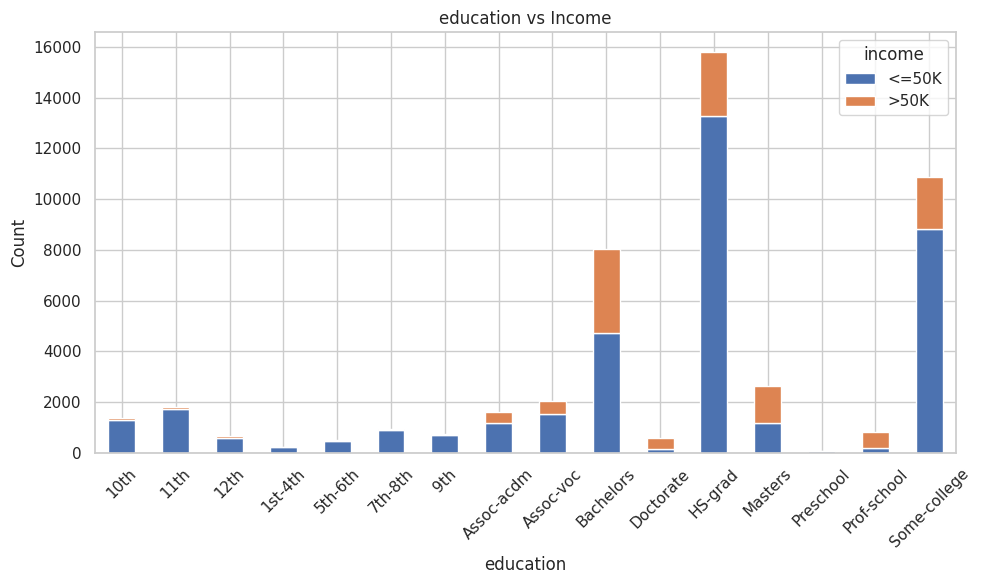

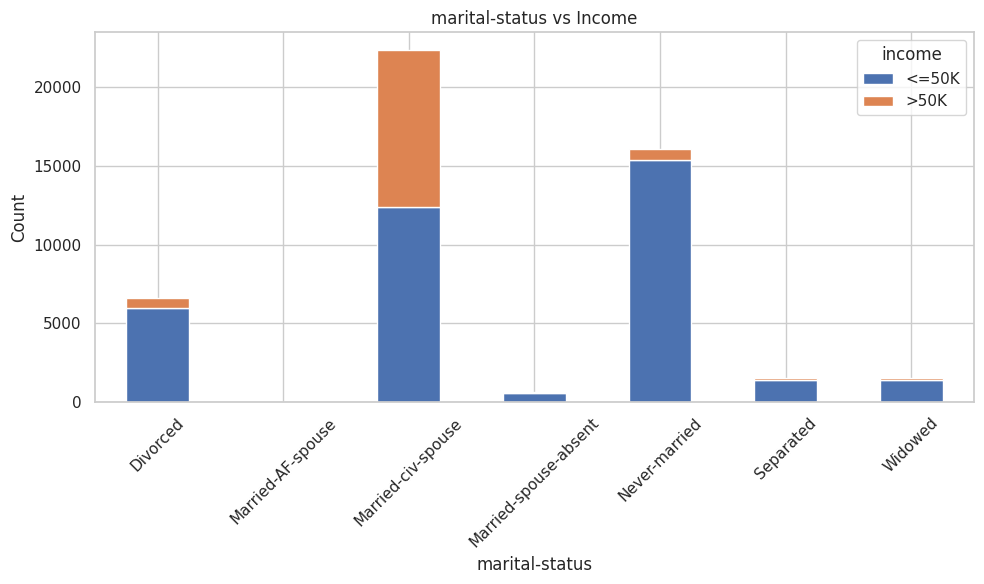

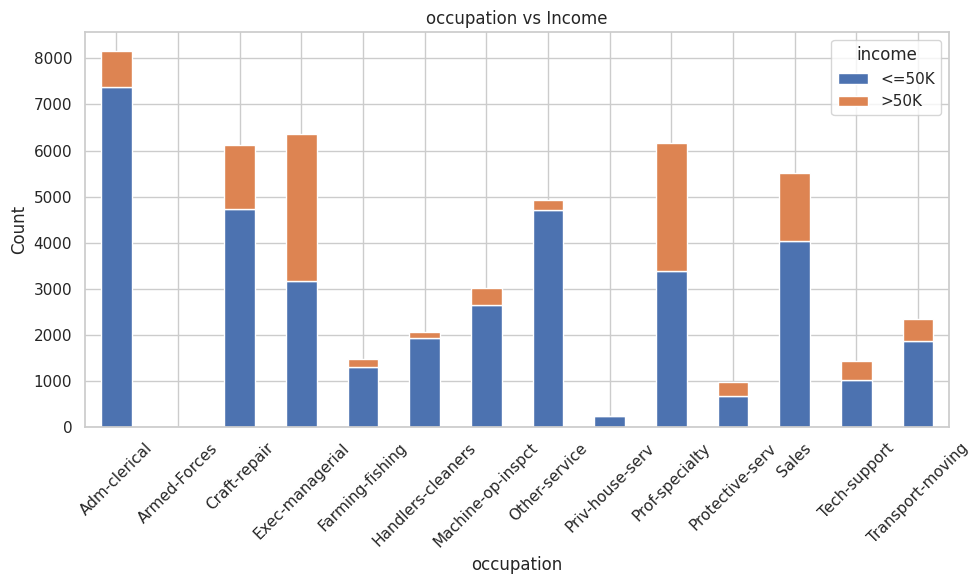

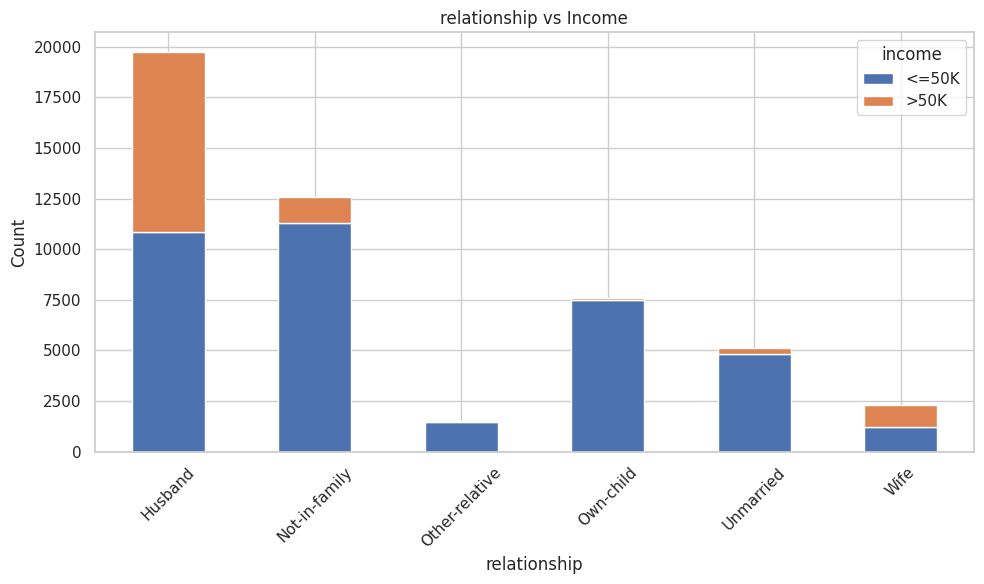

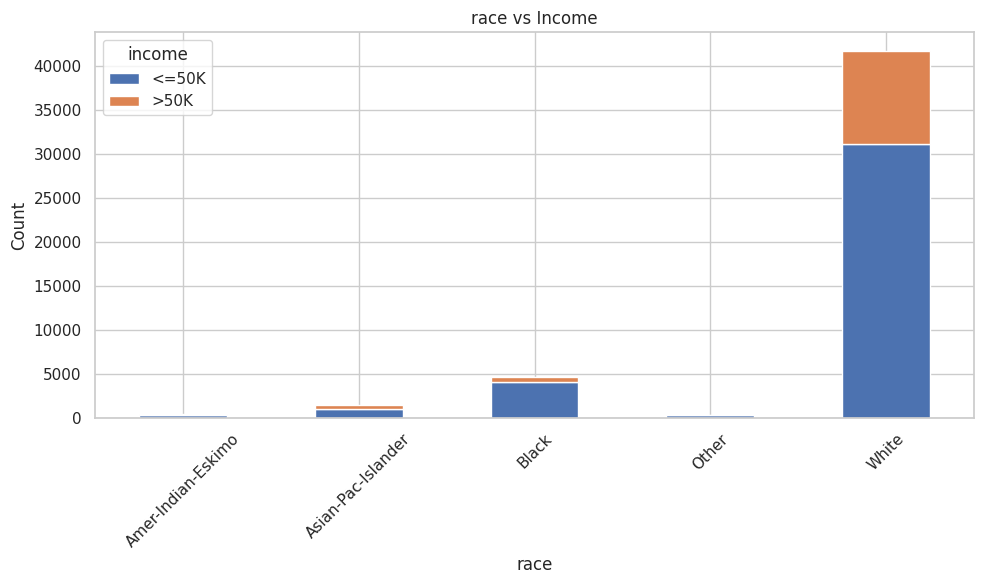

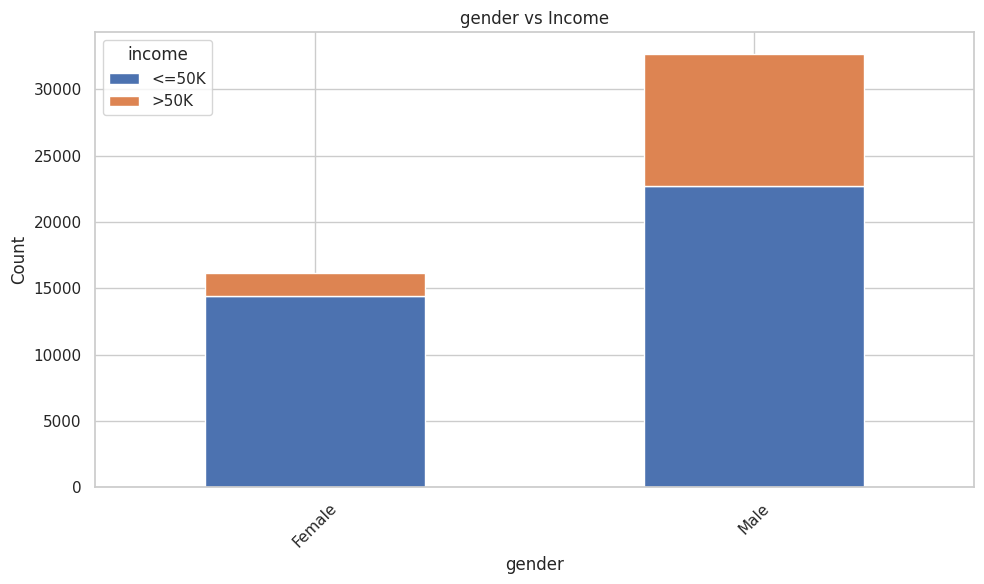

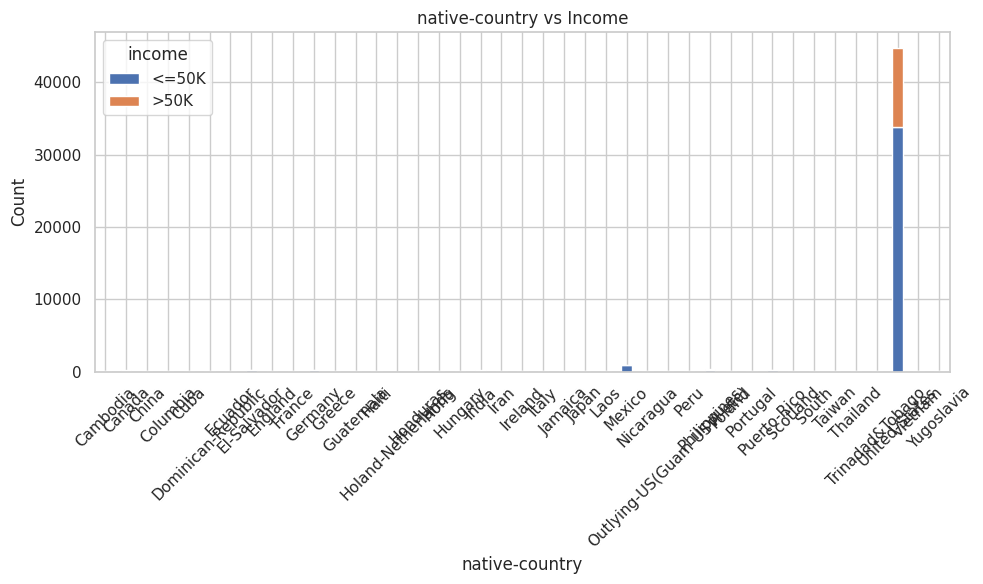

In [ ]:
# Plotting settings
plt.rcParams.update({'figure.max_open_warning': 0})  # To avoid warnings when many figures are opened

# Loop through each categorical variable except 'income'
for category in df_imputed.select_dtypes(include=['object']).columns:
    if category != 'income':  # Avoid plotting income by income
        # Create a cross-tabulation
        crosstab = pd.crosstab(df_imputed[category], df_imputed['income'])

        # Plot the crosstab as a stacked bar chart
        crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'{category} vs Income')
        plt.xlabel(category)
        plt.ylabel('Count')
        plt.xticks(rotation=45)  # Rotate category labels for better visibility if necessary
        plt.tight_layout()
        plt.show()


## 3.2 - EDA - Numerical Variables

analyze the central tendency, dispersion, and the distribution shape, as well as relationships between numerical variables and the target.

### a. Descriptive Stastistic and Distribution

In [ ]:
# Display descriptive statistics
print(df_imputed[numerical_vars].describe())


                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000  


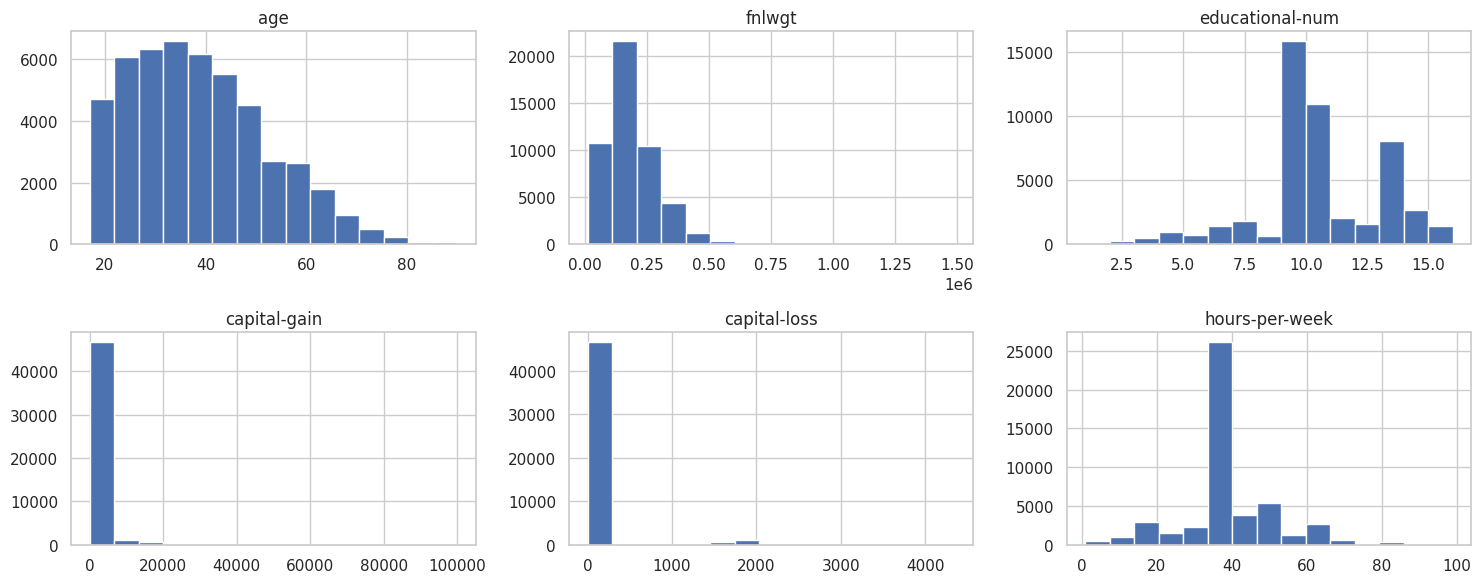

In [ ]:

# Histograms for numerical variables
df_imputed[numerical_vars].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()


### b. Boxplots to Indentify Outliers

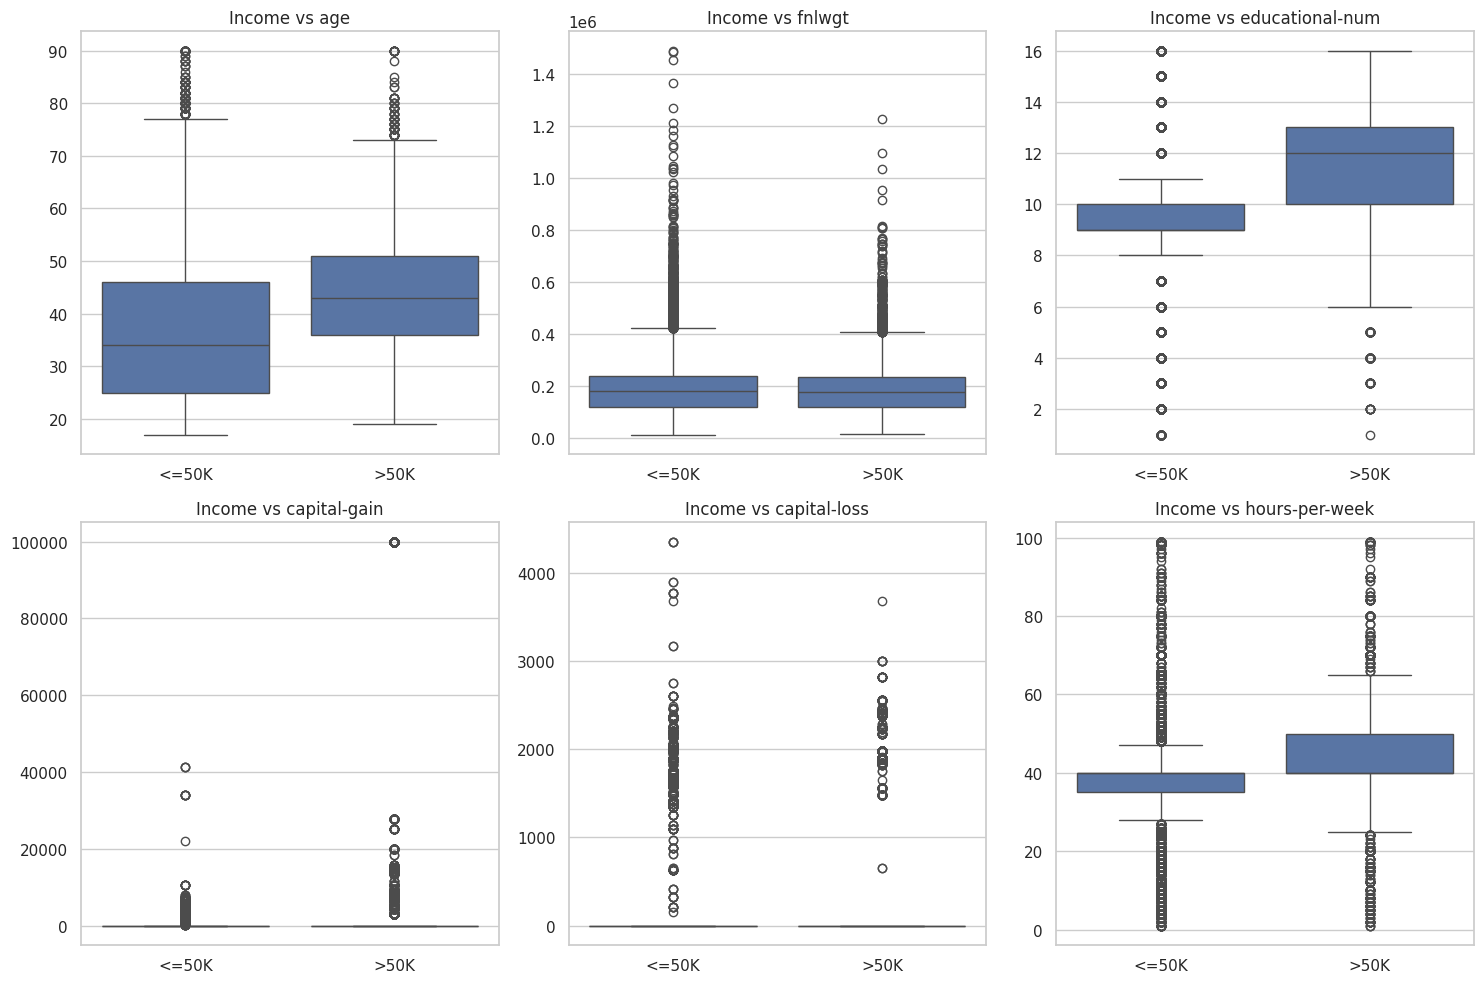

In [ ]:
# Boxplots for each numerical variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_vars):
    sns.boxplot(x='income', y=col, data=df_imputed, ax=axes[i])
    axes[i].set_title(f'Income vs {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
def handle_outliers(data, action='detect'):
    outliers_dict = {}
    for feature in data.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = data[feature].quantile(0.25)
        Q3 = data[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if action == 'detect':
            outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
            outliers_dict[feature] = outliers
        elif action == 'remove':
            # Remove outliers
            data = data[(data[feature] >= lower_bound) & (data[feature] <= upper_bound)]
        elif action == 'cap':
            # Cap outliers
            data[feature] = data[feature].clip(lower=lower_bound, upper=upper_bound)

    if action == 'detect':
        return outliers_dict
    return data

# To detect outliers
outliers_detected = handle_outliers(df_imputed, action='detect')
for key, value in outliers_detected.items():
    print(f"{key} has {len(value)} outliers")

# Uncomment below to remove or cap outliers
# df_no_outliers = handle_outliers(df_imputed, action='remove')
# df_capped = handle_outliers(df_imputed, action='cap')


age has 216 outliers
fnlwgt has 1453 outliers
educational-num has 1794 outliers
capital-gain has 4035 outliers
capital-loss has 2282 outliers
hours-per-week has 13496 outliers


- Capital Gain and Loss: Outliers in capital-gain and capital-loss might actually represent meaningful variations in financial attributes of individuals. For example, a small number of individuals might have unusually high capital gains, which could be an important feature for predicting higher income.

- Hours per Week: Many people work typical hours (around 40 per week), but those working significantly less or more could be in specific types of jobs or industries that are relevant to your income prediction.

Due to the quantity of outliers, I am going to choose a classification that is not sensitive to outliers, like:

- Decicion Trees
- Random Forest


### c. Correlation Analysis

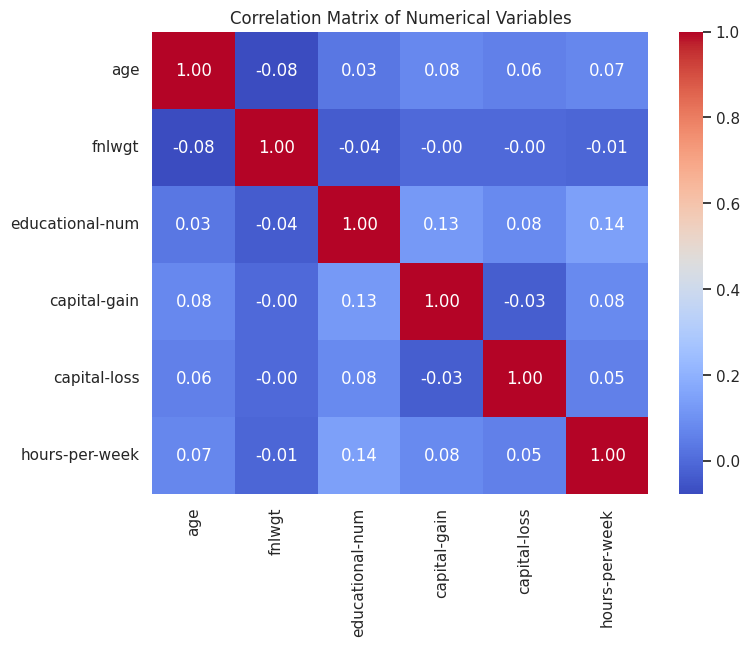

In [ ]:
# Correlation matrix
corr_matrix = df_imputed[numerical_vars].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


There are no particularly strong correlations between the variables, which is common in datasets with a large number of features and complex underlying relationships. The lack of strong correlation suggests that these variables can provide unique information to a model without much redundancy.

When building a classification model, features with low correlation to each other are generally good because they can add independent information to the model, improving its ability to learn from diverse aspects of the data.

# 4 Classification Model - Random Forest

Random Forest is an ensemble learning method that operates by constructing multiple decision trees during the training phase and outputting the class that is the mode of the classes (classification) of the individual trees.

How Random Forest works:

- Bootstrap Aggregating (Bagging): Random Forest creates a lot of individual decision trees, each trained on a random subset of the data. This subset is drawn from the training set with replacement, known as bootstrapping.
- Feature Randomness: When splitting a node during the construction of a tree, the best split is chosen from a random subset of the features, rather than all features. This adds diversity to the model, making it robust.
- Decision Trees: Each tree in the forest is built to the largest extent possible (fully grown and unpruned). The randomness introduced during the construction of these trees ensures that they are not highly correlated.
- Voting: For classification tasks, each tree in the forest votes for a class, and the class with the most votes becomes the model's prediction.

Random Forest is good when dealing with outliers for several reasons:

- Robustness: Individual trees are relatively insensitive to outliers. Splits that define the decision trees are based on subsets of the overall dataset and are determined by the order of the values (e.g., median) rather than their magnitude. Thus, extreme outlier values do not heavily influence the split points. Random Forest inherits this robustness because it is an ensemble of decision trees.
- Averaging: Since Random Forest takes the mode of the predictions from all trees, even if some trees are influenced by outliers, the averaging effect will dilute the impact of these outliers. This is especially true when the number of trees is large.
- Feature Selection: At each split in a tree, a subset of features is randomly chosen. This further reduces the chance of outliers influencing the entire model, as only a subset of all decision trees will consider any single feature possibly containing outliers.

These characteristics make Random Forest a strong performer for datasets with outliers and non-normal distributions, as it does not make strong assumptions about the form of the input data compared to other algorithms like linear regression or logistic regression.

## 4.1 Encoding and prepairing data for model

In [ ]:
# Encoding categorical variables with OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(df_imputed.select_dtypes(include=['object']))

# Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out())

In [ ]:
# Combine with numerical data
X = pd.concat([df_imputed.select_dtypes(include=['int64', 'float64']), encoded_df], axis=1)

# Target variable
y = df_imputed['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.2 Training Random Forest

In [ ]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the classifier
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_clf.predict(X_test)

## 4.3 Evaluating the model

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7416
           1       1.00      1.00      1.00      2353

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769



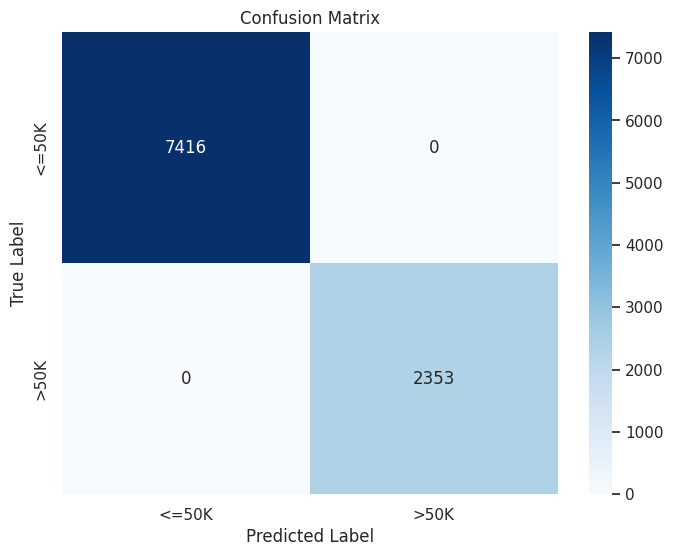

In [ ]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


We have detect overfitting in our model, to fix it we are going to try make a Random Forest more complex:
- 1 Cross-Validation
- 2 Simplify the Model: Random Forests can overfit if they have too many trees or if individual trees are too deep.

  - Reduce the number of trees: Although more trees generally reduce overfitting in Random Forests, there is a point of diminishing returns.
  - Prune the trees: Set a maximum depth for trees (max_depth), minimum samples per split (min_samples_split), or minimum samples per leaf (min_samples_leaf) to prevent building overly complex models.

- 3 Feature Selection: Remove irrelevant or partially relevant features that can cause the model to be too complex. I am going to remove: 'capital-gain', 'capital-loss', educational-num, native-country and 'fnlwgt', they are not providing information to our dataset

## 4.4 Fixing overfitting - Prepairing data

In [ ]:
df_fixed= df_imputed.copy()

In [ ]:
#removing features

df_fixed = df_fixed.drop(['capital-gain', 'capital-loss','educational-num', 'native-country', 'fnlwgt'], axis=1)

In [ ]:
df_fixed

,age,workclass,education,marital-status,occupation,relationship,race,gender,hours-per-week,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,<=50K
2,18,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,30,<=50K
3,34,Private,10th,Never-married,Other-service,Not-in-family,White,Male,30,<=50K
4,29,Private,HS-grad,Never-married,Adm-clerical,Unmarried,Black,Male,40,<=50K
...,...,...,...,...,...,...,...,...,...,...
48837,71,Private,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,10,>50K
48838,39,Local-gov,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,20,>50K
48839,53,Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,>50K
48840,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K


In [ ]:
# Encoding categorical variables with OneHotEncoder
encoded_categorical_fixed = encoder.fit_transform(df_fixed.select_dtypes(include=['object']))

# Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical_fixed, columns=encoder.get_feature_names_out())

In [ ]:
# Combine with numerical data
X2 = pd.concat([df_fixed.select_dtypes(include=['int64', 'float64']), encoded_df], axis=1)

# Target variable
y2 = df_fixed['income'].apply(lambda x: 1 if x == '>50K' else 0)

# Split the data into training and test sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

## 4.5 Training Random Forest Pruned - Cross Validation

In [ ]:
# Adjusting hyperparameters to mitigate overfitting
rf_clf_adjusted = RandomForestClassifier(n_estimators=100,
                                         max_depth=10,  # Limit the depth of each tree
                                         min_samples_split=10,  # Minimum number of samples required to split a node
                                         min_samples_leaf=5,  # Minimum number of samples required at each leaf node
                                         random_state=42,
                                         oob_score=True)  # Enable OOB scoring

In [ ]:
# Perform cross-validation to check for overfitting
cv_scores = cross_val_score(rf_clf_adjusted, X_train2, y_train2, cv=5, scoring='accuracy')

In [ ]:
#Evaluation
print(f"CV Scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean()}")

# Train the adjusted classifier
rf_clf_adjusted.fit(X_train2, y_train2)

# Evaluate the adjusted classifier
print(f"OOB Score: {rf_clf_adjusted.oob_score_}")

CV Scores: [1. 1. 1. 1. 1.]
Mean CV Score: 1.0
OOB Score: 1.0


In [ ]:
# Predict on the test set
y_pred2 = rf_clf_adjusted.predict(X_test2)

In [ ]:
print(classification_report(y_test2, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7416
           1       1.00      1.00      1.00      2353

    accuracy                           1.00      9769
   macro avg       1.00      1.00      1.00      9769
weighted avg       1.00      1.00      1.00      9769



# 5 Clustering Model - DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Fine-Tuned

- Instead of forming clusters of the nearest points, DBSCAN groups together points that are closely packed together (points with many nearby neighbors).
- It also marks as outliers the points that are in low-density regions.

We are going to continue with the dataframe enconded from the Random Forest Pruned

## 5.1 Selecting parameters

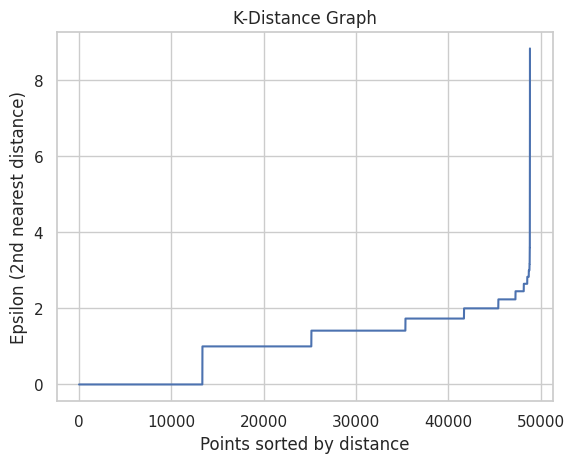

In [ ]:
# NearestNeighbors class to perform the search
neigh = NearestNeighbors(n_neighbors=2)  # n_neighbors set to 2 for the second closest point
nbrs = neigh.fit(X2)
distances, indices = nbrs.kneighbors(X2)

# Sort and plot distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Take the second closest point
plt.plot(distances)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('Epsilon (2nd nearest distance)')
plt.show()


## 5.2 Fine-Tune DBSCAN with Estimated 'eps'

In [ ]:

estimated_eps = 3

# Start with a larger min_samples and decrease if necessary
min_samples = 2 * X2.shape[1]

while True:
    db = DBSCAN(eps=estimated_eps, min_samples=min_samples)
    db.fit(X2)

    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

    print(f"For min_samples={min_samples}, estimated number of clusters: {n_clusters_}")

    if n_clusters_ <= 5:
        break
    else:
        min_samples -= 1  # Decrease min_samples if too many clusters

# Cluster visualization can be added here as before using PCA for dimensionality reduction


For min_samples=108, estimated number of clusters: 2


In [ ]:
db = DBSCAN(eps=3, min_samples=108)
# Fit the model
clusters = db.fit_predict(X2)

In [ ]:
# Check the number of clusters found
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters}')
print(f'Estimated number of noise points: {n_noise}')

Estimated number of clusters: 2
Estimated number of noise points: 6256


## 5.3 Visualizacion DBSCAN Fine-Tuned with PCA in 2d

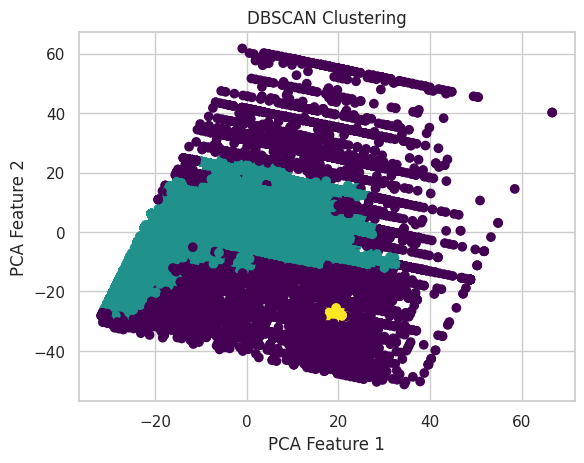

In [ ]:

from sklearn.decomposition import PCA

pca = PCA(n_components=50).fit_transform(X2)

# Scatter plot of the clusters
plt.scatter(pca[:, 0], pca[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

# 6 Workflow and Pipelines

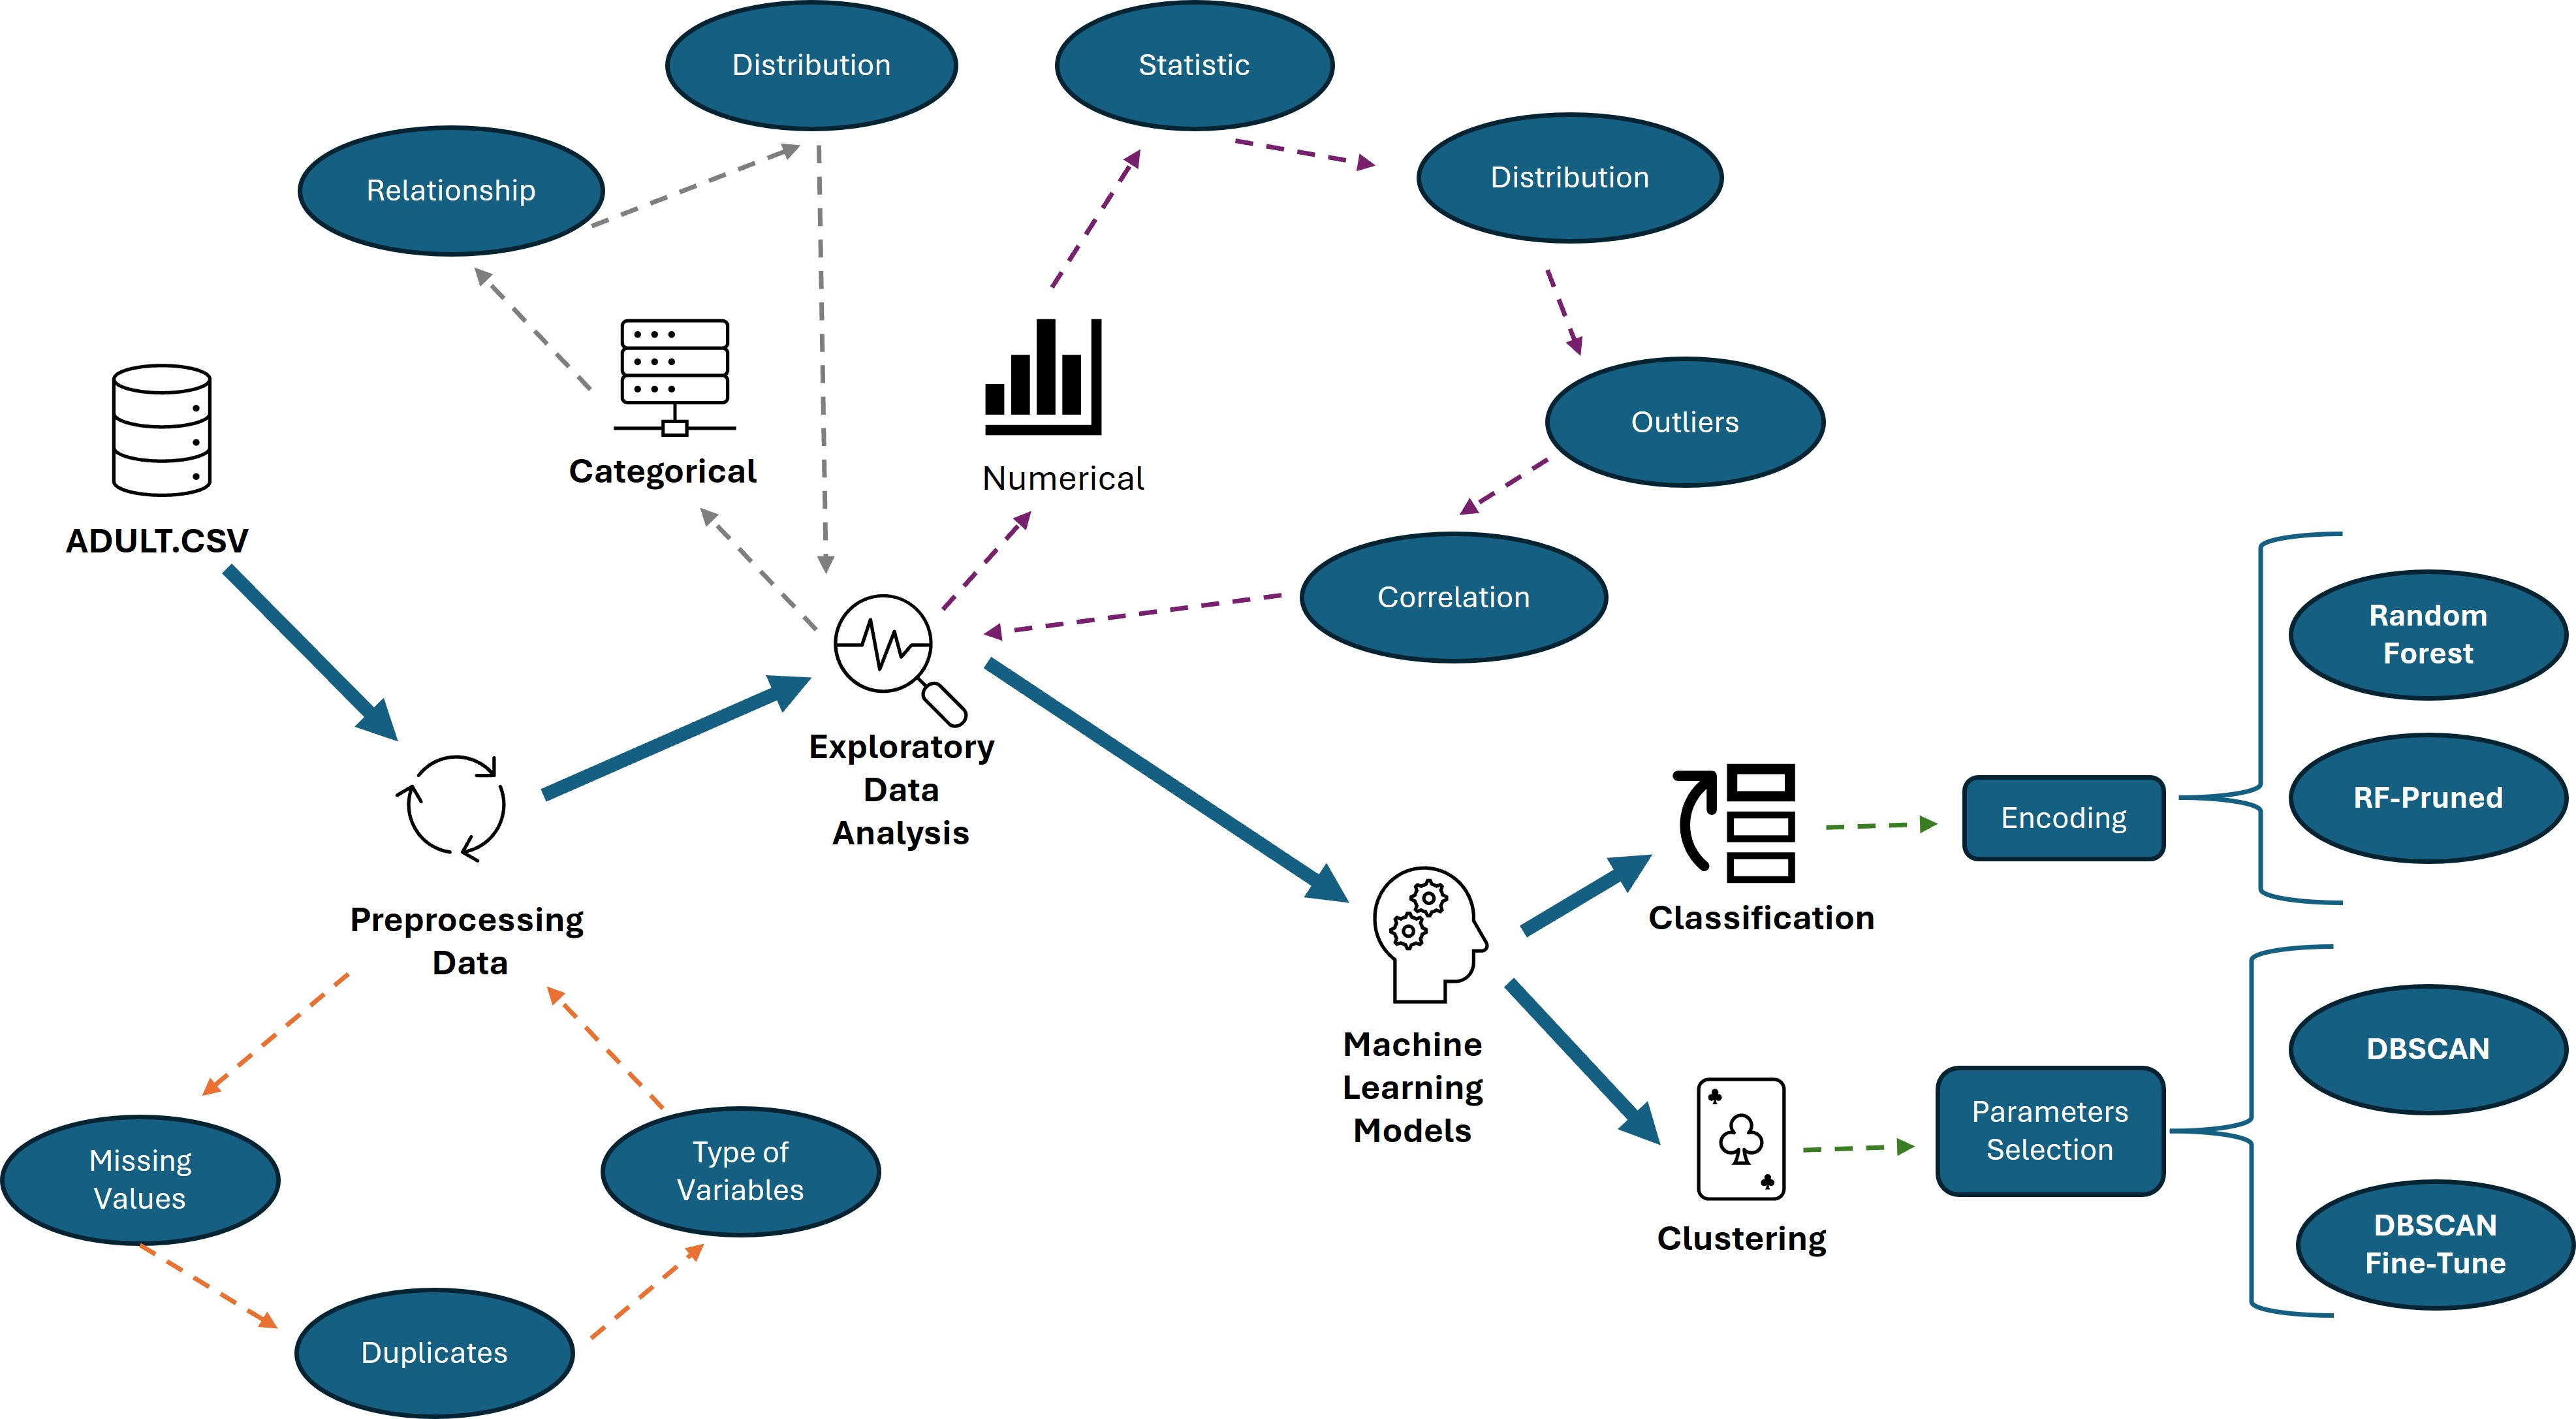